# A binary classification Neural Network #

Purpose of this notebook :

- create a binary classification neural network from scratch
- practice oop programming
- practice docstring and commentaries

In [34]:
# Add useful librairies

import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_moons, make_circles, make_classification

In [119]:
# First the full neural network

# The prupose is to predict from data
# let's create some data a XOR problematic

# Let's fix ou random seed
np.random.seed(42)

# A dataset of m example with 2 inputs shape(2 m)
X = np.random.randn(2, 1000)
# Transorm inputs in O. or 1.
X = (X > 0.5) * 1.

# The labels (when x = (0 0) or (1 1) > False, x = (0 1) or (1 0) > True)
Y = (np.sum(X, axis=0, keepdims=True) == 1) * 1.

# Add a test set
train_size = int(X.shape[1] * 0.9)
X_test = X[:,train_size:]
Y_test = Y[:,train_size:]
X = X[:,:train_size]
Y = Y[:,:train_size]


print('X : ', X.shape)
print('Y : ', Y.shape)
print('X_test : ', X_test.shape)
print('Y_test : ', Y_test.shape)

X :  (2, 900)
Y :  (1, 900)
X_test :  (2, 100)
Y_test :  (1, 100)


In [60]:
# Créer un dataset séparable par une ligne droite en 2D

def split_dataset(X, y, train_pct=0.66):
    """ Va séparer les datasets avec respect pour le pourcentage du dataset à mettre dans le train set.
    Warning: La dimension des exemples doit être la première.
    Warnings2: Cette fonction doit recevoir des exemples déjà mélangé (car splité en fonction des index)
    
    TODO: Rajouter un argument pour mélanger les dataset
    
    :X mes exemples, shape=(m, -1), m -> dimensions des exemples
    :y mes labels, shape=(m, -1), m -> dimensions des exemples
    :train_pct (default=0.66) Optionnal, c'est un pourcentage qui va séparer le de dataset avec train_pct * total_size dans le train set.
    
    return X_train, y_train, X_test, y_test 
    

    >>> X_train, y_train, X_test, y_test = split_dataset(X, y)
    """
    # 2ème dimension -> celle des exemples
    total_size = X.shape[1]
    
    if y.ndim == 1:
        y = y.reshape(1, -1)
    
    # On récupère `train_pct` % du dataset pour le train set, aussi il faut convertir en entier pour numpy ...
    train_size = int(train_pct * total_size)
    # ... et on met le reste danss le test set
    test_size  = total_size - train_size 
    
    # On met les `train_size` premier exemples/labels dans le train set ...
    X_train, y_train = (X[:,:train_size], y[:,:train_size])
    # ... et les test_size derniers exemples/labels dans le test set.
    X_test , y_test  = (X[:,-test_size:], y[:,-test_size:])

    # On s'assure que tous les exemples soient présents dans le test set ou le train set.
    assert X_test.shape[1] + X_train.shape[1] == total_size
    assert y_test.shape[1] + y_train.shape[1] == total_size
    
    return X_train, y_train, X_test, y_test

X = np.zeros((2,100))
Y = np.zeros((1,100))

a, b, c, d = split_dataset(X,Y,0.9)
print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)

(2, 90)
(1, 90)
(2, 10)
(1, 10)


In [89]:
# SET de MOON
# On fixe le nombre d'example total par dataset à SAMPLE_SIZE
SAMPLE_SIZE = 2000

# Fixer le hasard
np.random.seed(666)

# On crée le dataset séparable linéarement
X, Y = make_moons(n_samples = SAMPLE_SIZE,
                          shuffle = True,
                          noise = 0.1)

X = X.T
Y = Y.T

# On split le dataset en set de training et de test
X, Y, X_test, Y_test = split_dataset(X, Y, 0.9)

# On affiche le shape pour la forme
for each in (X, Y, X_test, Y_test):
    print(each.shape)

(2, 1800)
(1, 1800)
(2, 200)
(1, 200)


In [116]:
# CIRCLE SET
# On fixe le nombre d'example total par dataset à SAMPLE_SIZE
SAMPLE_SIZE = 1000

# Fixer le hasard
np.random.seed(1)

# On crée le dataset séparable linéarement
X, y = make_circles(n_samples = SAMPLE_SIZE,
                          shuffle = True,
                          noise = 0.1)
X = X.T
y = y.T

# On split le dataset en set de training et de test
X, Y, X_test, Y_test = split_dataset(X, y)

# On affiche le shape pour la forme
for each in (X, Y, X_test, Y_test):
    print(each.shape)
    
print(X)

(2, 660)
(1, 660)
(2, 340)
(1, 340)
[[ 0.92787748 -0.54303182  0.9246533  ...  0.75209229 -0.69471802
  -0.08402948]
 [-0.04521731 -0.75444674 -0.71492522 ... -0.73132156 -0.90889854
  -0.96805179]]


In [32]:
# Coding the sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# testons la sigmoid
sigmoid(0)

0.5

In [117]:
# Normalisation
X = X - (np.amax(X) + np.amin(X)) / 2
print(X)
X = X / np.amax(X)
print(X)

[[ 0.90243391 -0.56847539  0.89920974 ...  0.72664872 -0.72016158
  -0.10947305]
 [-0.07066087 -0.77989031 -0.74036878 ... -0.75676513 -0.93434211
  -0.99349536]]
[[ 0.74011604 -0.46622556  0.73747179 ...  0.59594876 -0.59062845
  -0.08978248]
 [-0.05795133 -0.63961396 -0.60720104 ... -0.62064823 -0.76628501
  -0.81479856]]


0.694267591910045
0.6823533921157102
0.6823527286774689
0.6823527286774514
0.6823527286774512
0.6823527286774511
0.6823527286774511
0.6823527286774511
0.6823527286774511
0.6823527286774511
0.6823527286774512
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774512
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774512
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774512
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774511
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774514
0.6823527286774511
0.68235272867

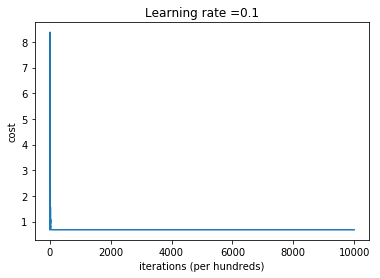

Accuracy train set :  57.33333333333333
Loss test set :  0.6823527286774511
Accuracy test set :  54.0


In [120]:
# let's concatenate all our cells

# parameters
np.random.seed(42)
hidden_layers = [4, 3, 2]
iteration = 10000
learning_rate = 0.1

layers = [X.shape[0]] + hidden_layers + [1]
# we need a list to store our costs
costs = []

# Initialisation of list Weights and bias shape (output_layer(-1) layer) (output_layer(-1) 1)
W = [np.random.randn(layers[k], layers[k-1]) for k in range(1, len(layers))]
b = [np.zeros((layers[k], 1)) for k in range(1, len(layers))]

# training loop
for k in range(iteration):
    # Forward -------------------------------------------------
    # Let's make a list of activation starting with the inputs matrix
    activation = [X]
    # Loop to pass through all neurons
    for l in range(len(layers)-1):
    #     print(activation[l],' * ',W[l],' + ',b)
        pre_activation = np.dot(W[l], activation[l]) + b[l]
    #     print('preactivation :',pre_activation)
        activation.append(sigmoid(pre_activation))

    # loss and cost ----------------------------------
    prediction_inter = activation[-1]
    # loss function
    loss = -Y * np.log(prediction_inter) - (1 - Y) * np.log(1 - prediction_inter)
    # number of examples
    m = X.shape[1]
    # Cost function
    cost = np.sum(loss) / m
    if k % 100 == 0:
        print(cost)
    # Cost storage
    costs.append(cost)

    # Backward --------------------------------------------------

    # First the last layer
    d_loss = -Y/activation[-1] + (1-Y)/(1-activation[-1])
    d_activation = activation[-1] * (1 - activation[-1])
    d_pre_activation = d_loss * d_activation
#     d_pre_activation = (activation[-1] - Y)

    d_W = [np.dot(d_pre_activation, activation[-2].T)]
    d_b = [np.sum(d_pre_activation, axis=1, keepdims=True) / m]

    # Loop for the next layers
    for l in reversed(range(1, len(layers)-1)):
        d_pre_activation = np.dot(W[l].T, d_pre_activation)
        d_pre_activation_sig = d_pre_activation * (activation[l] * (1 - activation[l]))

        d_W.insert(0, np.dot(d_pre_activation_sig, activation[l-1].T))
        d_b.insert(0, np.sum(d_pre_activation_sig, axis=1, keepdims=True) / m)

    # updating the parameters
    # Loop for updating all weights and bias in the network
    for i in range(len(layers)-1):
        W[i] -= learning_rate * d_W[i]
        b[i] -= learning_rate * d_b[i]

# Let's show the loss evolution
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

# Let's compute the accuracy
prediction = (activation[-1] > 0.5) * 1
accuracy = (1 - np.mean(np.abs(Y - prediction))) * 100
print('Accuracy train set : ', accuracy)
        
# Now the test set to compare
# Forward -------------------------------------------------
# Let's make a list of activation starting with the inputs matrix
activation_test = [X_test]
# Loop to pass through all neurons
for l in range(len(layers)-1):
    pre_activation = np.dot(W[l], activation_test[l]) + b[l]
    activation_test.append(sigmoid(pre_activation))

# loss and cost ----------------------------------
prediction_test_inter = activation_test[-1]
# loss function
loss_test = -Y_test * np.log(prediction_test_inter) - (1 - Y_test) * np.log(1 - prediction_test_inter)
# number of examples
m_test = X_test.shape[1]
# Cost function
cost_test = np.sum(loss) / m_test
print('Loss test set : ', cost)
    
# Let's compute the accuracy
prediction_test = (activation_test[-1] > 0.5) * 1
accuracy_test = (1 - np.mean(np.abs(Y_test - prediction_test))) * 100
print('Accuracy test set : ', accuracy_test)